# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('25__iris.csv', sep=",")
df.columns = ['długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka', 'klasa']
df

,długość kielicha,szerokość kielicha,długość płatka,szerokość płatka,klasa
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 1. Ogólne informacje o danych
- 10 losowych rekordów

In [4]:
df.sample(10)

,długość kielicha,szerokość kielicha,długość płatka,szerokość płatka,klasa
147,6.5,3.0,5.2,2.0,Iris-virginica
52,6.9,3.1,4.9,1.5,Iris-versicolor
68,6.2,2.2,4.5,1.5,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
24,4.8,3.4,1.9,0.2,Iris-setosa
71,6.1,2.8,4.0,1.3,Iris-versicolor
12,4.8,3.0,1.4,0.1,Iris-setosa
109,7.2,3.6,6.1,2.5,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
111,6.4,2.7,5.3,1.9,Iris-virginica


- informacje o kolumnach

In [26]:
print('Informacje o kolumnach: ')
print(df.info())
print('\nUnikatowe wartości:')
df.nunique()

Informacje o kolumnach: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   długość kielicha    150 non-null    float64
 1   szerokość kielicha  150 non-null    float64
 2   długość płatka      150 non-null    float64
 3   szerokość płatka    150 non-null    float64
 4   klasa               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Unikatowe wartości:


długość kielicha      35
szerokość kielicha    23
długość płatka        43
szerokość płatka      22
klasa                  3
dtype: int64

In [11]:
df["klasa"].value_counts()

klasa
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# 2. Analiza brakujących wartości

In [18]:
df.isnull().sum()

długość kielicha      0
szerokość kielicha    0
długość płatka        0
szerokość płatka      0
klasa                 0
dtype: int64

*Brak pustych kolumn*

In [24]:
print('Liczba zduplikowanych wartości: ')
print(df.duplicated().sum())
print('\nZduplikowane wiersze: ')
df[df.duplicated()]

Liczba zduplikowanych wartości: 
3

Zduplikowane wiersze: 


,długość kielicha,szerokość kielicha,długość płatka,szerokość płatka,klasa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [ ]:
df[df.duplicated()]


,długość kielicha,szerokość kielicha,długość płatka,szerokość płatka,klasa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


# 3. Analiza poszczególnych zmiennych

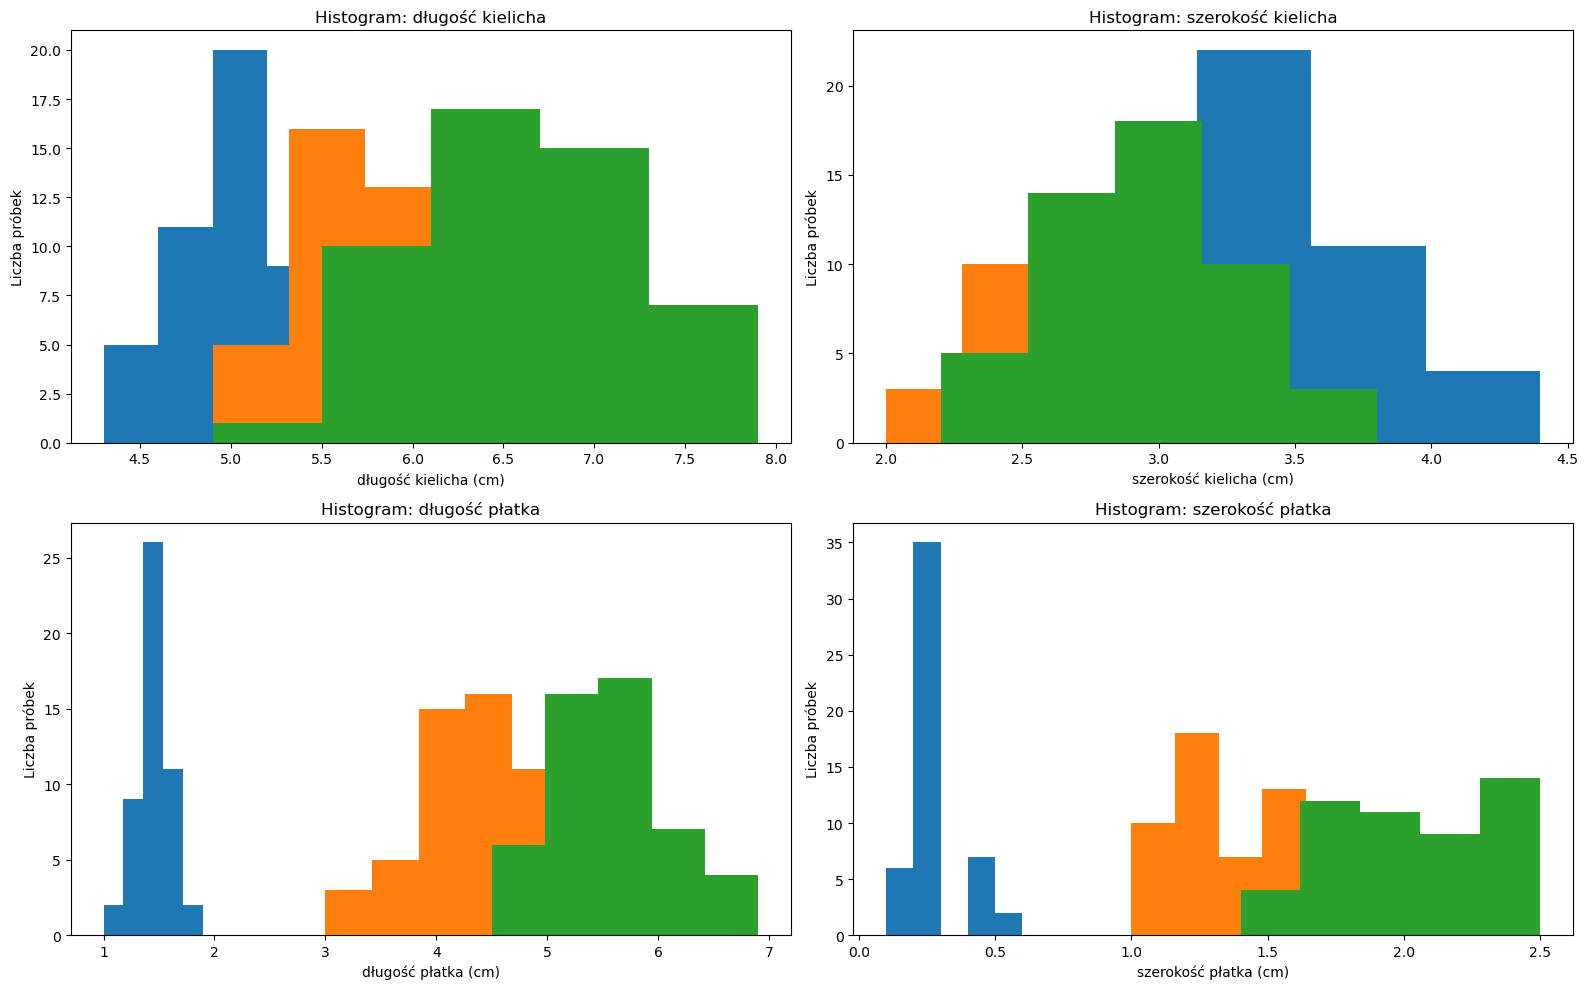

In [36]:
features = ['długość kielicha', 'szerokość kielicha', 'długość płatka', 'szerokość płatka']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby('klasa')[feature].plot(kind='hist', bins=5)
    plt.title(f"Histogram: {feature}")
    plt.xlabel(f"{feature} (cm)")
    plt.ylabel("Liczba próbek")
plt.tight_layout()
plt.show()

# 4. Transformacje

*dane kompletne*

# 5. Analiza zależności między zmiennymi

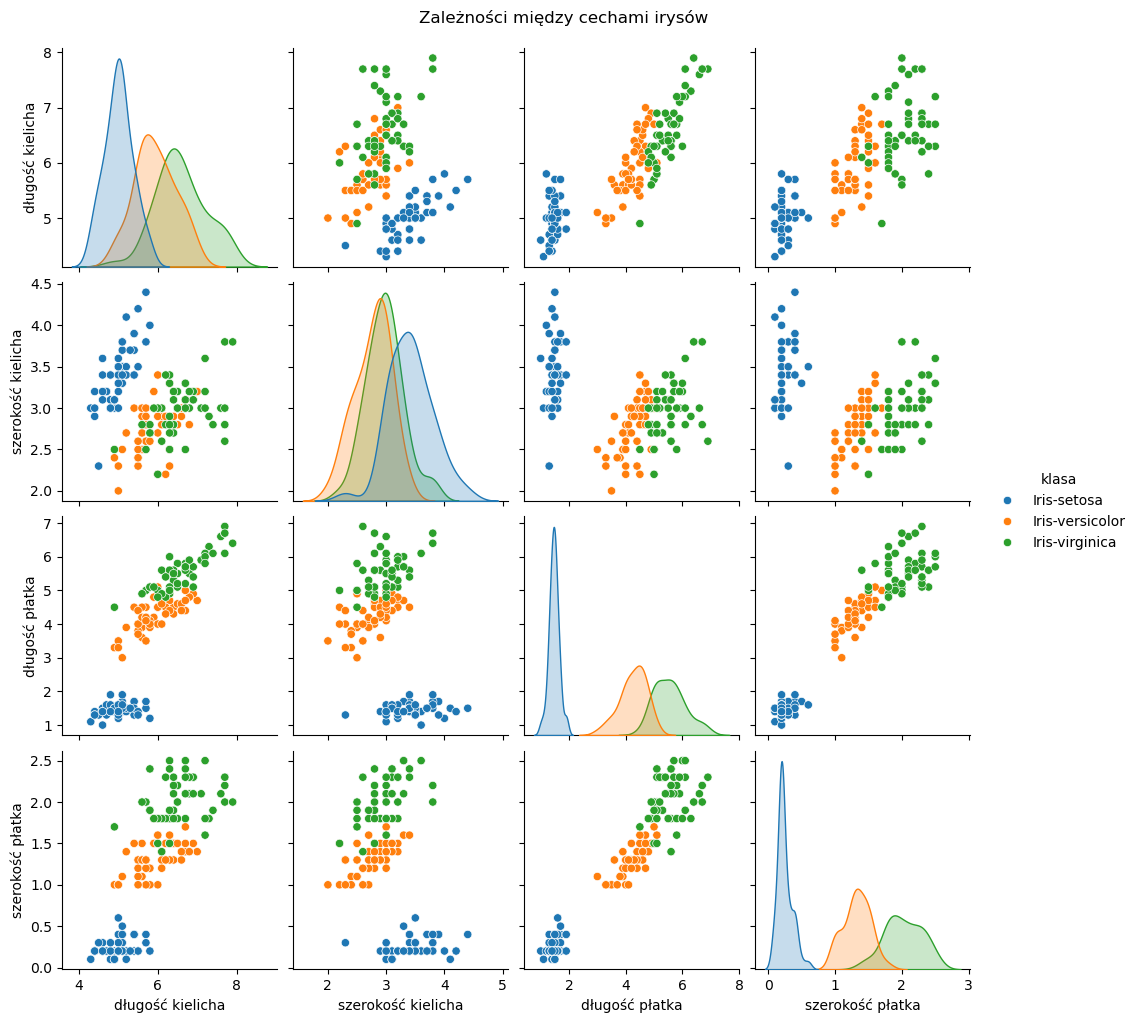

In [39]:
 # Wizualizacja zależności między zmiennymi za pomocą pairplot
sns.pairplot(df, hue="klasa")
plt.suptitle("Zależności między cechami irysów", y=1.02)
plt.show()

In [40]:
df.groupby('klasa')[['długość kielicha','szerokość kielicha','długość płatka','szerokość płatka']].corr()

długość kielicha  szerokość kielicha  \
klasa                                                                      
Iris-setosa     długość kielicha            1.000000            0.746780   
                szerokość kielicha          0.746780            1.000000   
                długość płatka              0.263874            0.176695   
                szerokość płatka            0.279092            0.279973   
Iris-versicolor długość kielicha            1.000000            0.525911   
                szerokość kielicha          0.525911            1.000000   
                długość płatka              0.754049            0.560522   
                szerokość płatka            0.546461            0.663999   
Iris-virginica  długość kielicha            1.000000            0.457228   
                szerokość kielicha          0.457228            1.000000   
                długość płatka              0.864225            0.401045   
                szerokość płatka            0.281108            0.537728   

                                    długość płatka  szerokość płatka  
klasa                                                                 
Iris-setosa     długość kielicha          0.263874          0.279092  
                szerokość kielicha        0.176695          0.279973  
                długość płatka            1.000000          0.306308  
                szerokość płatka          0.306308          1.000000  
Iris-versicolor długość kielicha          0.754049          0.546461  
                szerokość kielicha        0.560522          0.663999  
                długość płatka            1.000000          0.786668  
                szerokość płatka          0.786668          1.000000  
Iris-virginica  długość kielicha          0.864225          0.281108  
                szerokość kielicha        0.401045          0.537728  
                długość płatka            1.000000          0.322108  
                szerokość płatka          0.322108          1.000000

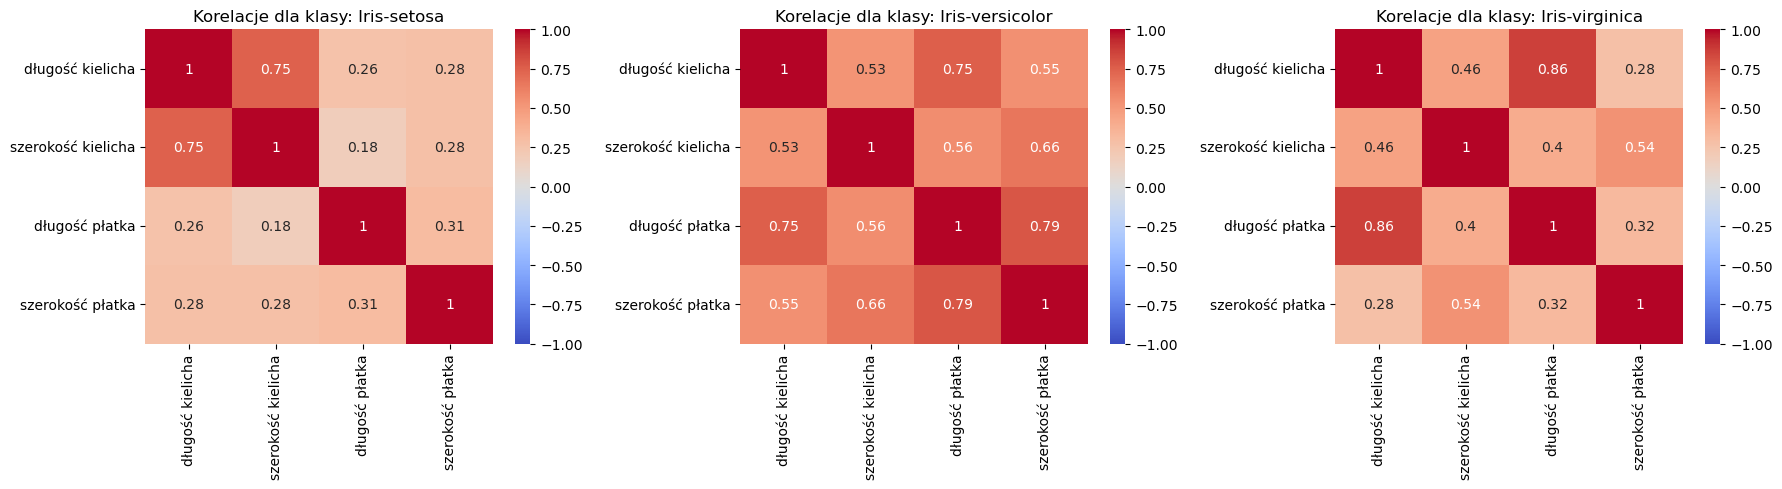

In [41]:
klasy = df['klasa'].unique()

plt.figure(figsize=(18, 5))

for i, klasa in enumerate(klasy):
    plt.subplot(1, 3, i + 1)
    corr = df[df['klasa'] == klasa][features].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Korelacje dla klasy: {klasa}')

plt.tight_layout()
plt.show()

Wnioski:
- im większa długość płatka tym większa długość kielicha,
- im większa szerokość płatka tym większa długość kielicha,
- im większa szerokość płatka tym większa długość płatka,

# 6. Analiza wartości odstających

array([[<Axes: title={'center': 'długość kielicha'}, xlabel='klasa'>,
        <Axes: title={'center': 'szerokość kielicha'}, xlabel='klasa'>],
       [<Axes: title={'center': 'długość płatka'}, xlabel='klasa'>,
        <Axes: title={'center': 'szerokość płatka'}, xlabel='klasa'>]],
      dtype=object)

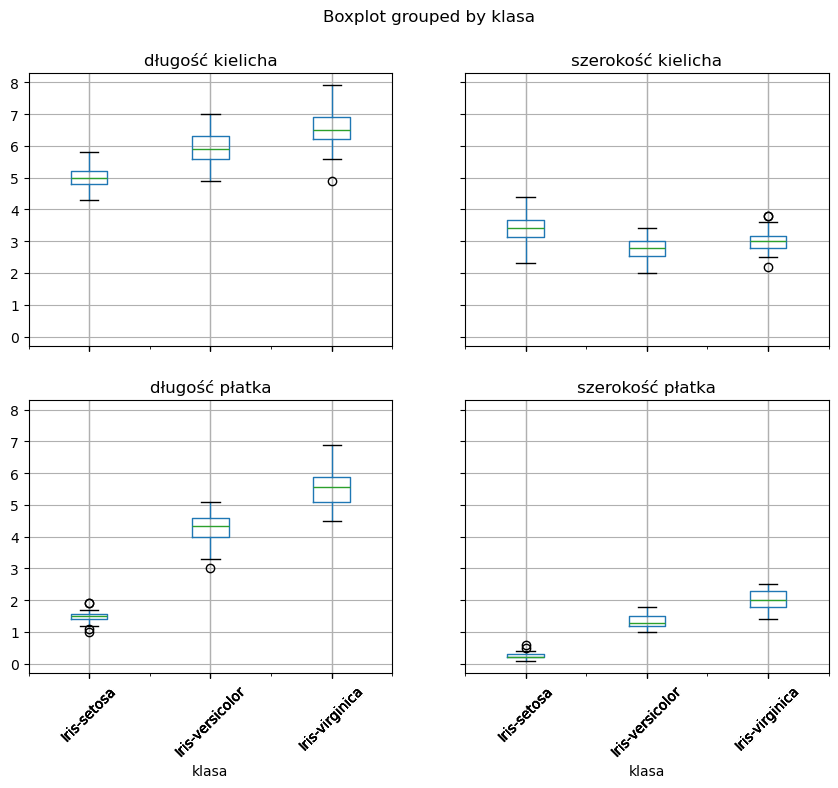

In [44]:
df.boxplot(
    column=[
        'długość kielicha',
        'szerokość kielicha',
        'długość płatka',
        'szerokość płatka'
    ],
    by='klasa',
    layout=(2,2),
    figsize=(10,8),
    rot=45
)